## 1. Import Libraries

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure

## 2. Confirm Python Executable

In [2]:
sys.executable

'C:\\Users\\Misbah\\Anaconda3\\envs\\demo\\python.exe'

## 3. Import the Data

In [3]:
project_dir = os.getcwd()
project_dir

'C:\\Python Programs\\CampusX Live Sessions\\MongoDB 2 - Data Science Workflow'

In [4]:
data_dir = os.path.join(project_dir, "data")
data_dir

'C:\\Python Programs\\CampusX Live Sessions\\MongoDB 2 - Data Science Workflow\\data'

In [5]:
data_file = os.path.join(data_dir, "yellow_tripdata_2024-05.parquet")
data_file

'C:\\Python Programs\\CampusX Live Sessions\\MongoDB 2 - Data Science Workflow\\data\\yellow_tripdata_2024-05.parquet'

In [6]:
df = pd.read_parquet(data_file)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-05-01 00:59:15,2024-05-01 01:23:50,1.0,6.10,1.0,N,138,145,1,28.20,7.75,0.5,5.00,0.00,1.0,42.45,0.0,1.75
1,2,2024-04-30 23:58:26,2024-05-01 00:29:42,1.0,11.23,1.0,N,138,249,1,46.40,6.00,0.5,8.72,0.00,1.0,66.87,2.5,1.75
2,2,2024-05-01 00:57:17,2024-05-01 01:14:15,1.0,9.02,1.0,N,138,170,1,35.90,6.00,0.5,10.57,6.94,1.0,65.16,2.5,1.75
3,2,2024-05-01 00:24:47,2024-05-01 00:48:51,1.0,6.53,1.0,N,87,133,1,30.30,1.00,0.5,7.06,0.00,1.0,42.36,2.5,0.00
4,2,2024-05-01 00:11:20,2024-05-01 00:52:10,1.0,14.38,1.0,N,161,165,1,61.80,1.00,0.5,0.00,0.00,1.0,66.80,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723828,2,2024-05-31 23:45:00,2024-06-01 00:09:00,NaN,4.07,NaN,None,88,186,0,29.93,0.00,0.5,0.00,0.00,1.0,33.93,NaN,NaN
3723829,2,2024-05-31 23:10:52,2024-05-31 23:38:05,NaN,4.81,NaN,None,231,143,0,30.71,0.00,0.5,0.00,0.00,1.0,34.71,NaN,NaN
3723830,2,2024-05-31 23:23:57,2024-05-31 23:38:35,NaN,2.03,NaN,None,142,140,0,17.15,0.00,0.5,4.23,0.00,1.0,25.38,NaN,NaN
3723831,2,2024-05-31 23:44:12,2024-05-31 23:47:44,NaN,0.94,NaN,None,141,263,0,-1.00,0.00,0.5,0.00,0.00,1.0,3.00,NaN,NaN


## 4. Summarize the Data

In [7]:
# size of the data

df.shape

(3723833, 19)

In [8]:
# data types of features

df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [9]:
# meta-data of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723833 entries, 0 to 3723832
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [10]:
# missing values

na_counts = df.isna().sum()
na_pct = df.isna().sum().div(df.shape[0]).mul(100).round(2)

na_df = (
	pd
	.concat([na_counts, na_pct], axis=1)
	.set_axis(["count", "pct"], axis=1)
	.query("count > 0")
	.sort_values(by="count", ascending=False)
)
na_df

,count,pct
passenger_count,404666,10.87
RatecodeID,404666,10.87
store_and_fwd_flag,404666,10.87
congestion_surcharge,404666,10.87
Airport_fee,404666,10.87


In [11]:
# duplicate values

df.duplicated().sum()

0

## 5. Load Data into MongoDB

In [12]:
# establish connection to MongoDB local server

try:
	client = MongoClient('mongodb://localhost:27017/')
	db = client['taxis']
except ConnectionFailure as e:
	print(f"Couldn't connect to MongoDB: {e}")
else:
	print("Successfully connected to MongoDB!")
	collection = db['taxi_data']

Successfully connected to MongoDB!


In [13]:
# convert Parquet to JSON format

start_time = timer()
data_json = df.to_dict(orient='records')
end_time = timer()

print(f"Time taken to convert to JSON: {end_time - start_time:.0f} seconds")

Time taken to convert to JSON: 74 seconds


In [14]:
# insert data into collection

start_time = timer()
collection.insert_many(data_json)
end_time = timer()

print(f"Data loaded into MongoDB in {end_time - start_time:.0f} seconds")

Data loaded into MongoDB in 257 seconds


## 6. Query and Visualize the Data

### 6.1 What are the peak hours for taxi pickups?

In [15]:
# query

q1 = collection.aggregate([
	{
		"$project": {"hour": {"$hour": "$tpep_pickup_datetime"}}
	},
	{
		"$group": {
			"_id": "$hour",
			"num_trips": {"$count": {}}
		}
	},
	{
		"$sort": {"_id": 1}
	}
])

df1 = pd.DataFrame(q1)
df1

,_id,num_trips
0,0,102722
1,1,62329
2,2,38586
3,3,25155
4,4,20260
5,5,23567
6,6,54186
7,7,109935
8,8,146843
9,9,158463


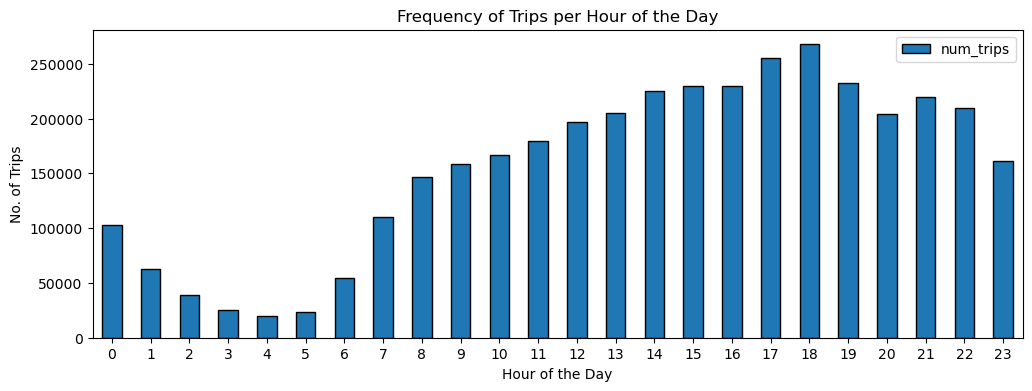

In [16]:
# plot

fig, ax = plt.subplots()

(
	df1
	.rename(columns={"_id": "hour"})
	.set_index("hour")
	.plot(
		kind="bar",
		ax=ax,
		figsize=(12, 4),
		rot=0,
		xlabel="Hour of the Day",
		ylabel="No. of Trips",
		title="Frequency of Trips per Hour of the Day",
		edgecolor="black"
	)
)

plt.show()

### 6.2 What is the average trip distance by passenger count?

In [17]:
# query

q2 = collection.aggregate([
	{
		"$group": {
			"_id": "$passenger_count",
			"avg_distance": {"$avg": "$trip_distance"}
		}
	},
	{
		"$sort": {"_id": 1}
	}
])

df2 = pd.DataFrame(q2)
df2

,_id,avg_distance
0,NaN,21.325457
1,0.0,2.576342
2,1.0,3.287827
3,2.0,4.070044
4,3.0,3.804252
5,4.0,3.875974
6,5.0,3.327658
7,6.0,3.077066
8,7.0,8.092500
9,8.0,5.581667


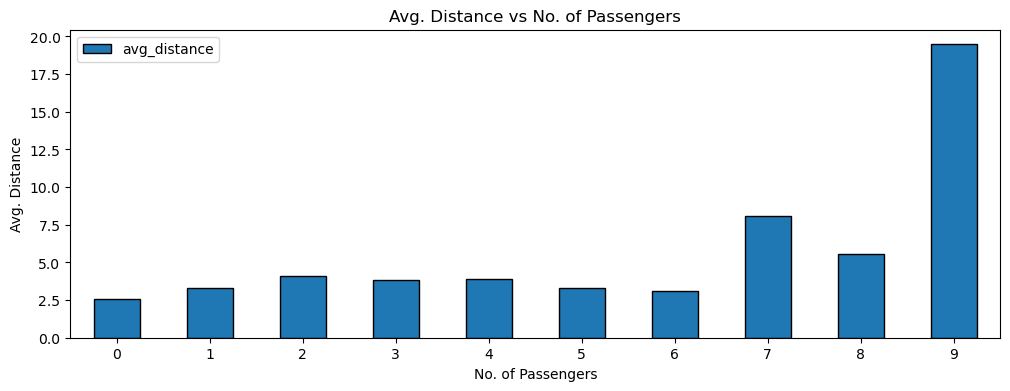

In [18]:
# plot

fig, ax = plt.subplots()

(
	df2
	.dropna()
	.rename(columns={"_id": "passenger_count"})
	.assign(passenger_count=lambda df_: df_.passenger_count.astype(int))
	.set_index("passenger_count")
	.plot(
		kind="bar",
		ax=ax,
		figsize=(12, 4),
		rot=0,
		xlabel="No. of Passengers",
		ylabel="Avg. Distance",
		title="Avg. Distance vs No. of Passengers",
		edgecolor="black"
	)
)

plt.show()

### 6.3 What is the distribution of payment types?

In [19]:
# query

q3 = collection.aggregate([
	{
		"$group": {
			"_id": "$payment_type",
			"num_trips": {"$count": {}}
		}
	},
	{
		"$sort": {"_id": 1}
	}
])

df3 = pd.DataFrame(q3)
df3

,_id,num_trips
0,0,404666
1,1,2727878
2,2,502495
3,3,24494
4,4,64300


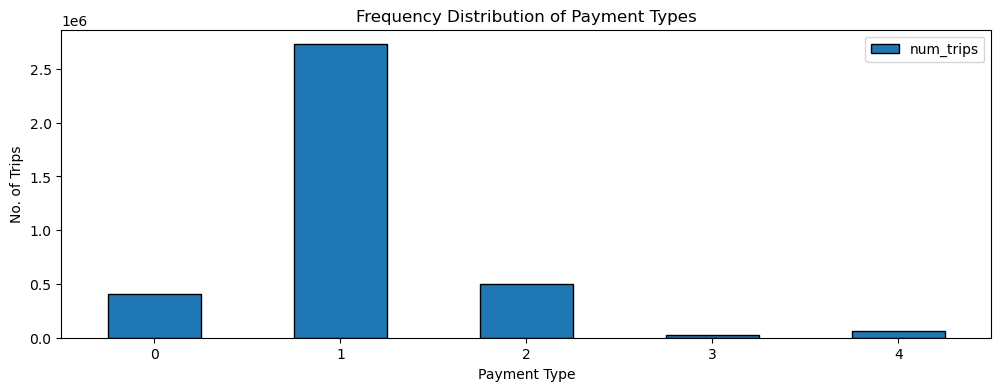

In [20]:
# plot

fig, ax = plt.subplots()

(
	df3
	.rename(columns={"_id": "payment_type"})
	.set_index("payment_type")
	.plot(
		kind="bar",
		ax=ax,
		figsize=(12, 4),
		rot=0,
		xlabel="Payment Type",
		ylabel="No. of Trips",
		title="Frequency Distribution of Payment Types",
		edgecolor="black"
	)
)

plt.show()

### 6.4 What are the top 10 days with the highest number of trips?

In [21]:
# query

q4 = collection.aggregate([
	{
		"$project": {"day_of_month": {"$dayOfMonth": "$tpep_pickup_datetime"}}
	},
	{
		"$group": {
			"_id": "$day_of_month",
			"num_trips": {"$count": {}}
		}
	},
	{
		"$sort": {"num_trips": -1}
	},
	{
		"$limit": 10
	}
])

df4 = pd.DataFrame(q4)
df4

,_id,num_trips
0,16,143801
1,15,138562
2,10,138324
3,18,138069
4,9,136618
5,4,133764
6,17,133268
7,2,133110
8,14,131795
9,11,131001


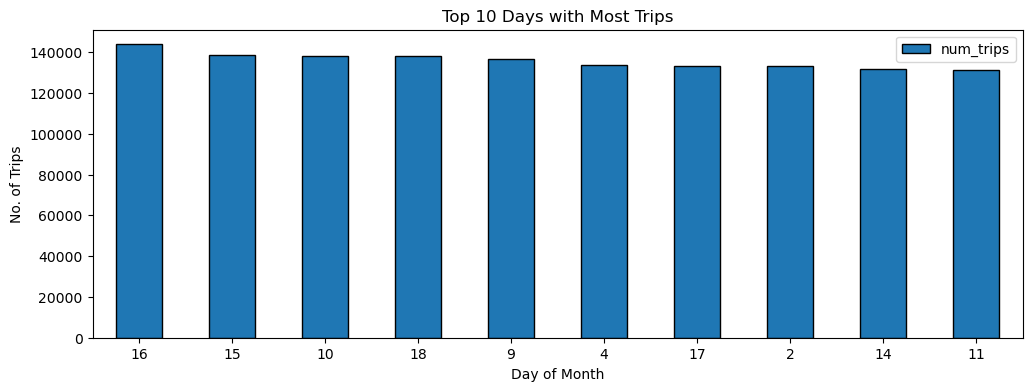

In [22]:
# plot

fig, ax = plt.subplots()

(
	df4
	.rename(columns={"_id": "day_of_month"})
	.set_index("day_of_month")
	.plot(
		kind="bar",
		ax=ax,
		figsize=(12, 4),
		rot=0,
		xlabel="Day of Month",
		ylabel="No. of Trips",
		title="Top 10 Days with Most Trips",
		edgecolor="black"
	)
)

plt.show()

### 6.5 What is the total fare amount collected by each payment type?

In [23]:
# query

q5 = collection.aggregate([
	{
		"$group": {
			"_id": "$payment_type",
			"total_fare": {"$sum": "$total_amount"}
		}
	},
	{
		"$sort": {"_id": 1}
	}
])

df5 = pd.DataFrame(q5)
df5

,_id,total_fare
0,0,10400086.24
1,1,82499685.95
2,2,12052594.49
3,3,253178.43
4,4,457258.09


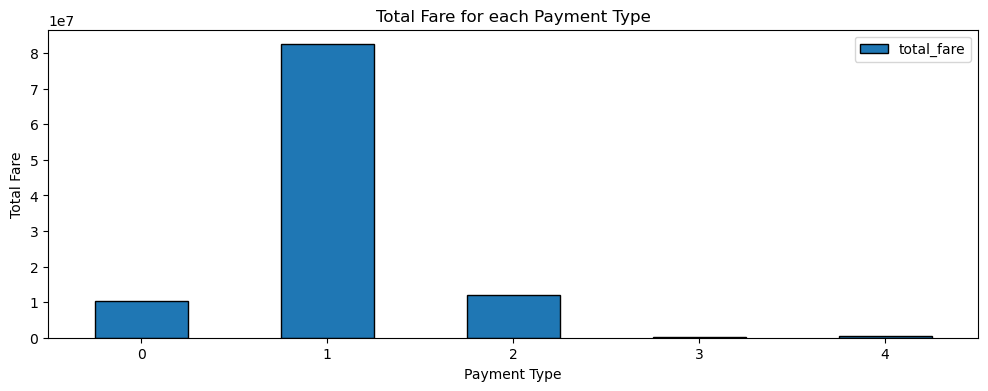

In [24]:
# plot

fig, ax = plt.subplots()

(
	df5
	.rename(columns={"_id": "payment_type"})
	.set_index("payment_type")
	.plot(
		kind="bar",
		ax=ax,
		figsize=(12, 4),
		rot=0,
		xlabel="Payment Type",
		ylabel="Total Fare",
		title="Total Fare for each Payment Type",
		edgecolor="black"
	)
)

plt.show()

### 6.6 What are the average trip distances for each hour of the day?

In [25]:
# query

q6 = collection.aggregate([
	{
		"$project": {
			"hour": {"$hour": "$tpep_dropoff_datetime"},
			"trip_distance": True
		}
	},
	{
		"$group": {
			"_id": "$hour",
			"avg_distance": {"$avg": "$trip_distance"}
		}
	},
	{
		"$sort": {"_id": 1}
	}
])

df6 = pd.DataFrame(q6)
df6

,_id,avg_distance
0,0,5.457908
1,1,5.247510
2,2,4.865184
3,3,3.452305
4,4,4.262191
5,5,13.323685
6,6,16.130876
7,7,12.849331
8,8,6.178673
9,9,9.017733


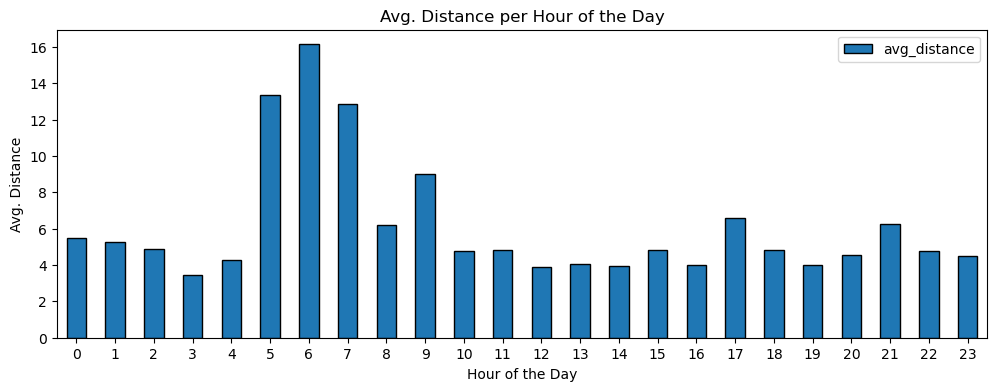

In [26]:
# plot

fig, ax = plt.subplots()

(
	df6
	.rename(columns={"_id": "hour"})
	.set_index("hour")
	.plot(
		kind="bar",
		ax=ax,
		figsize=(12, 4),
		rot=0,
		xlabel="Hour of the Day",
		ylabel="Avg. Distance",
		title="Avg. Distance per Hour of the Day",
		edgecolor="black"
	)
)

plt.show()

### 6.7 What is the distribution of trips by passenger count?

In [27]:
# query

q7 = collection.aggregate([
	{
		"$group": {
			"_id": "$passenger_count",
			"num_trips": {"$count": {}}
		}
	},
	{
		"$sort": {"_id": 1}
	}
])

df7 = pd.DataFrame(q7)
df7

,_id,num_trips
0,NaN,404666
1,0.0,39748
2,1.0,2570334
3,2.0,488079
4,3.0,108153
5,4.0,62902
6,5.0,30021
7,6.0,19905
8,7.0,4
9,8.0,18


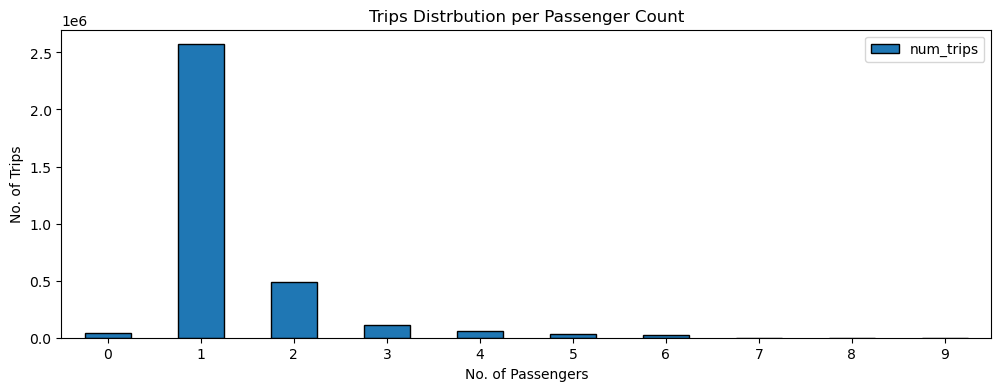

In [28]:
# plot

fig, ax = plt.subplots()

(
	df7
	.dropna()
	.rename(columns={"_id": "passenger_count"})
	.assign(passenger_count=lambda df_: df_.passenger_count.astype(int))
	.set_index("passenger_count")
	.plot(
		kind="bar",
		ax=ax,
		figsize=(12, 4),
		rot=0,
		xlabel="No. of Passengers",
		ylabel="No. of Trips",
		title="Trips Distrbution per Passenger Count",
		edgecolor="black"
	)
)

plt.show()

## 7. Summary

- There're about 10% observations that have missing values in few columns in the dataset
- There're no duplicate entries in the dataset
- The peak hours in terms of trips are from 3pm to 7pm
- The average trip distance travelled seems to be higher when there're more passengers in the rides
- The first 3 weeks of the month seem to be the busiest in terms of most trips
- The max. average distance travelled in a day is early in the morning, from 5am to 7am
- Majority of trips in the month of May seem to comprise of a single passenger